# Code your own SVM with hand-made gradient descent 🔥

Inspired by open-source notebook from Aurelien Geron [here](https://github.com/ageron/handson-ml2/blob/master/05_support_vector_machines.ipynb)

## 0) Setup

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# to make this notebook's output stable across runs
np.random.seed(42)

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
penguin_df = sns.load_dataset('penguins')
penguin_df.dropna(inplace=True)

⚠️⚠️⚠️ Scaling is particularly important with SVMs. SVMs try to maximize the distance between the separating plane and the support vectors so if one feature (i.e. one dimension in this space) has much larger values, it dominates the other features when calculating our distance. If we rescale all features (e.g. to [0, 1]), they all have the same influence on the distance metric.⚠️⚠️⚠️

In [ ]:
X = MinMaxScaler().fit_transform(penguin_df[["bill_depth_mm", "flipper_length_mm"]].values)
y = (penguin_df["species"] == "Gentoo").astype(np.float64).values.reshape(-1, 1)

(333, 2)
(333, 1)


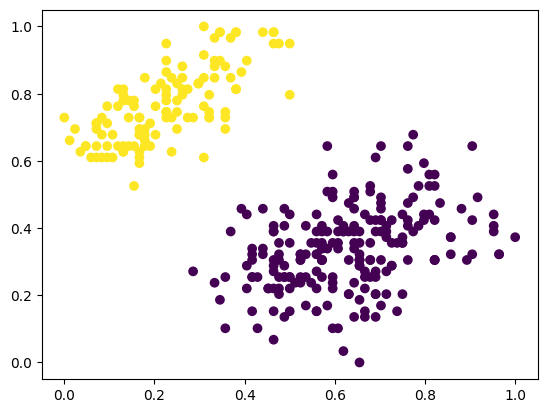

In [ ]:
print(X.shape)
print(y.shape)
plt.scatter(X[:,0], X[:,1], c=y);

☝️ Let's now try to code our own linear SVM ourselves to fit this dataset

## 1) Read about SVM cost function (optional)


- Read "Aurelien Geron - Hands-On Machine Learning with Scikit-Learn (2019)" chapter 5 (Support Vector Machine)
- Understand the cost function of the linear SVM, $J(\mathbf{w}, b)$ below

<img src='https://wagon-public-datasets.s3.amazonaws.com/data-science-images/ML/svm_cost_function.png'>

👉 It requires you to buy the book, which is one of the best books in Data Science, well designed for Le Wagon students

## 2) Code your own Linear SVM model with hand-made Gradient Descent solver

❓ Implement the model below, subclassing scikit-learn `BaseEstimator` class

The `fit` method should minimize the cost function  $J(\mathbf{w}, b)$ by gradient descent, after random initialization of its weights $\mathbf{w}$ and bias $b$

In [ ]:
from sklearn.base import BaseEstimator

class MyLinearSVC(BaseEstimator):
    def __init__(self, C=1, eta0=1, eta_d=10000, n_epochs=1000):
        self.C = C
        self.eta0 = eta0
        self.n_epochs = n_epochs
        self.eta_d = eta_d

    def eta(self, epoch):
        return self.eta0 / (epoch + self.eta_d)

    def fit(self, X, y):
        # TODO: Compute the weithgs w and b of the linear SVM by minimizing the cost function
        pass

    def decision_function(self, X):
        # TODO: What scalar should you compute so as to predict the class correctly ?
        pass

    def predict(self, X):
        return (self.decision_function(X) >= 0).astype(np.float64)

In [ ]:
from sklearn.base import BaseEstimator

class MyLinearSVC(BaseEstimator):
    def __init__(self, C=1, eta0=1, eta_d=10000, n_epochs=1000):
        self.C = C
        self.eta0 = eta0
        self.n_epochs = n_epochs
        self.eta_d = eta_d

    def eta(self, epoch):
        return self.eta0 / (epoch + self.eta_d)
        
    def fit(self, X, y):
        # Random initialization
        w = np.random.randn(X.shape[1], 1) # n feature weights
        b = 0

        m = len(X)
        t = y * 2 - 1  # -1 if y==0, +1 if y==1
        X_t = X * t
        self.Js=[]

        # Training
        for epoch in range(self.n_epochs):
            support_vectors_idx = (X_t.dot(w) + t * b < 1).ravel()
            X_t_sv = X_t[support_vectors_idx]
            t_sv = t[support_vectors_idx]

            J = 1/2 * np.sum(w * w) + self.C * (np.sum(1 - X_t_sv.dot(w)) - b * np.sum(t_sv))
            self.Js.append(J)

            w_gradient_vector = w - self.C * np.sum(X_t_sv, axis=0).reshape(-1, 1)
            b_derivative = -self.C * np.sum(t_sv)
                
            w = w - self.eta(epoch) * w_gradient_vector
            b = b - self.eta(epoch) * b_derivative
            

        self.intercept_ = np.array([b])
        self.coef_ = np.array([w])
        support_vectors_idx = (X_t.dot(w) + t * b < 1).ravel()
        self.support_vectors_ = X[support_vectors_idx]
        return self

    def decision_function(self, X):
        return X.dot(self.coef_[0]) + self.intercept_[0]

    def predict(self, X):
        return (self.decision_function(X) >= 0).astype(np.float64)


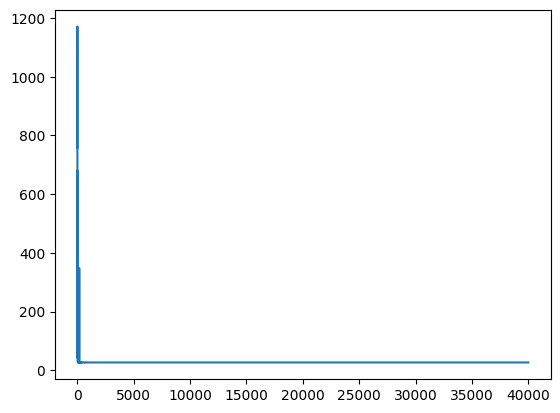

In [ ]:
# Check your gradient descent
model_custom = MyLinearSVC(C=2, eta0 = 10, eta_d = 1000, n_epochs=40000)
model_custom.fit(X, y)
model_custom.predict(np.array([[5, 2], [4, 1]]))

plt.plot(range(model_custom.n_epochs), model_custom.Js)

## 3) 🧪 Compare with scikit-learn default SVC

In [ ]:
model_scikit = SVC(kernel="linear", C=2)
model_scikit.fit(X, y.ravel())

SVC(C=2, kernel='linear')

In [ ]:
# Check that both models predict the same classes
assert (np.sum(np.abs(model_custom.predict(X).ravel() - model_scikit.predict(X).ravel())) == 0.)

In [ ]:
# Check that both models coefficients are quite close to each other
print(model_custom.intercept_, model_custom.coef_)
print(model_scikit.intercept_, model_scikit.coef_)

[-0.95627572] [[[-3.84627396]
  [ 4.28101008]]]
[-0.95573015] [[-3.84525705  4.27949815]]


☝️ Note that `scikit-learn` Linear SVC is much faster to converge, as it is optimized via quadratic solving instead of gradient descent!

🏁 **Congratulation!** Don't forget to push and commit your results!